# Support sur les fondamentaux 

## Utilisation de Jupyter Notebook

Le principe est simple : 
 - Chaque notebook est constitué d’une liste de **cellules**
 - Chacune peut contenir du **texte formaté** ou du **code** (Python, dans notre cas)
 - On **exécute** une cellule de code -> le résultat s’affiche sous la cellule

Cliquez sur le menu **Help** > **User Interface Tour** pour un tour rapide de l’interface.    

Pour vous entraîner :
- **Insérez** quelques cellules de code au début du notebook
- Exécutez quelques commandes Python, telles que **print("Hello world!")** :
    - Cliquez dans une cellule de code et saisissez le code à exécuter
    - Exécutez le code de la cellule en tapant Shift-Entrée ou en cliquant sur le bouton d’exécution
    
Lorsque vous **cliquez** à l’intérieur d’une cellule, vous passez en mode **édition** (la cellule est alors encadrée en *vert*). Lorsque vous tapez la **touche Echap** (Esc) ou que vous cliquez juste à gauche de la cellule, vous passez en mode **commande** (la cellule est alors encadrée en *bleu*). 

Lorsque vous êtes en **mode commande**, tapez la **touche H** pour afficher les nombreux **raccourcis clavier** disponibles

## Préparation

Tout d'abord, assurons-nous que ce bloc-notes fonctionne bien en python 3, importons quelques modules communs, assurons-nous que MatplotLib trace des figures :

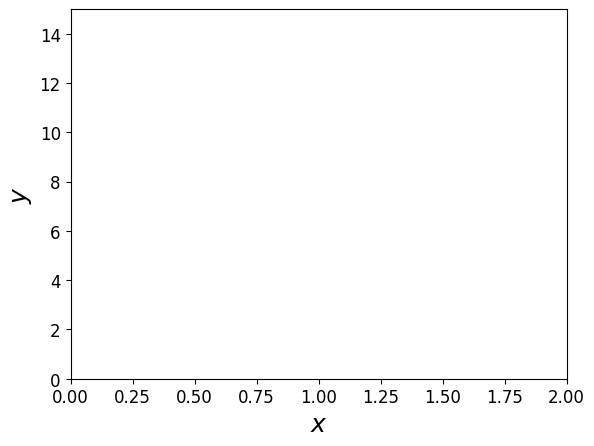

In [2]:
# Pour soutenir à la fois python 2 et python 3
from __future__ import division, print_function, unicode_literals

# Importations communes
import numpy as np
import os

# Pour que la production soit stable d'un bout à l'autre
np.random.seed(42)

# Pour tracer de jolis figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=90, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

## Préparation et initialisation

### Chargement des packages

In [3]:
import numpy as np
import sys
import glob
import os

from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

from sklearn import datasets

### Quelques fonctions

In [4]:
# import the random module 
import random
from sklearn.utils import shuffle

## Calcul de  points de manière inconnue
def computePoints(m):
    X1 = 10*np.random.rand(m, 1) # m valeurs aléatoires de 0 à 10 
    X2 = 10*np.random.rand(m, 1) # m valeurs aléatoires de 0 à 10 
    y =4 + 2 * X1 + 3* X2 + 10*np.random.randn(m, 1) # m valeurs de y coorespondantes à x1 et x2
    return [X1,X2,y]

## Calcul de  points de manière inconnue
def computepolyPoints(m):  
    e=3
    n=3127
    d=2011
    X = 6 * np.random.rand(m, 1) - 3 # 200 valeurs aléatoires de -3 à +3
    y = 3 * 8*X*X*X*X+ 23*X*X*X+ X**2 + X + 4 + np.random.randn(m, 1) # 200 y coorespondants à x
    return [X,y]

# Fonction Sigmoid
def sig(t):
    return 1 / (1 + np.exp(-t))

## Calcul de  points de manière inconnue
def computeLogistic(m,n):
    val = 10*np.random.rand(n, 1) # m valeurs aléatoires de 0 à 10 
    X = 5*np.random.rand(m, n) # m valeurs aléatoires de 0 à 5
    y_temp=X.dot(val)
    maxi=max(y_temp)
    mini=min(y_temp)
    y_norm=10-(y_temp-mini)/(maxi-mini)*20
    y_proba=sig(y_norm)
    y=np.round(y_proba)
    return [X,y]

## Calcul de  points de manière inconnue
def computeSoftMax(m,n,k):
    #val = 10*np.random.rand(n, k) # m valeurs aléatoires de 0 à 10 
    X = 5*np.random.rand(m, n) # m valeurs aléatoires de 0 à 5
    y=0*np.random.rand(m, 1)
    for cpt in range(0, m): 
        classe=int(np.round(k*np.random.rand(1, 1)))
        y[cpt]=classe
    return [X,y]

## Calcul de  points de manière inconnue
def computeFitnessData(n,k,mScale):
    m=k*mScale
    X = 0*np.random.rand(n, m)
    y = 0*np.random.rand(m)
    for j in range(0, n):     # 
        nums = []
        for cpt in range(0, k):     #  
            mu   = 100*np.random.rand() 
            sigma = 5*np.random.rand()
            for i in range(mScale):  # 2 lignes : m=k*100 mesures équilibrées
                temp = random.gauss(mu, sigma) 
                nums.append(temp) # nums contient 100 valeurs dans la même zone
        X[j]=nums
    index=0    
    for j in range(0, k):     # 
        for cpt in range(0, mScale):
            y[index]=j
            index=index+1     
    return [np.transpose(X),y]    
#[X,y] = computeFitnessData(4,4,5)
#print(y)


## Calcul de  points de manière inconnue
def computePregnancy(n,m):
    if m % 2 == 1:
        print('m is not even')
        m=m-1
    X = 0*np.random.rand(n, m)
    y = 0*np.random.rand(m)
    for j in range(0, n):     # 
        nums = []
        for cpt in range(0, 2):     #  
            mu   = 100*np.random.rand() 
            sigma = 5*np.random.rand()
            for i in range(int(m/2)):
                temp = random.gauss(mu, sigma) 
                nums.append(temp) 
        X[j]=nums
    index=0    
    for j in range(0, 2):     # 
        for cpt in range(0, int(m/2)):
            y[index]=j
            index=index+1     
    return [np.transpose(X),y]    
#[X,y] = computePregnancy(4,10)
#print(y)

## Calcul de  points de manière inconnue
def computeFGrad(m):
    X1 = 20*np.random.rand(m)
    X2 = 20*np.random.rand(m)    
    
    
    

## Exemple 3

- Application pour **montre connectée**
- Objectif : reconnaitre un **sport pratiqué**
- Idée : dès que **>100bbm** mesuré, prédire le sport en fonction des mesures :
  - 50 mesures données par l'application
  - Choisir parmi 4 sports
- Fonction enregistrement : l'utilisateur définit le sport qu'il est en train de faire
  - 480 activités ainsi enregistrées

In [5]:
k=4;
n=50;
mScale=120
m=k*mScale

In [6]:
# Calcul de données simulées
[Xtemp,ytemp] = computeFitnessData(n,k,mScale)  
X, y = shuffle(Xtemp, ytemp) 
print(X.shape)
print(y.shape)

(480, 50)
(480,)


# Découpage des données

In [7]:
# Paquets train_full et test
X_train_full,X_test=X[:450], X[450:] 
y_train_full,y_test=y[:450], y[450:] 

# Paquets train et valid
X_train,X_valid = X_train_full[:400], X_train_full[400:] 
y_train, y_valid = y_train_full[:400], y_train_full[400:] 

### Utilisation d'un perceptron

1. Modélisation de l'architecture

In [8]:
from sklearn.linear_model import Perceptron
percep = Perceptron(max_iter=10000, tol=1e-5, random_state=100)
X_train.shape

(400, 50)

2. Entraînement

In [9]:
percep.fit(X_train, y_train)

Perceptron(max_iter=10000, random_state=100, tol=1e-05)

3. Test

In [10]:
percep.predict(X_test)

array([2., 2., 3., 2., 1., 0., 1., 3., 3., 0., 0., 3., 2., 1., 2., 2., 3.,
       1., 3., 1., 3., 1., 3., 1., 0., 3., 1., 0., 1., 3.])

In [11]:
print(y_test)

[2. 2. 3. 2. 1. 0. 1. 3. 3. 0. 0. 3. 2. 1. 2. 2. 3. 1. 3. 1. 3. 1. 3. 1.
 0. 3. 1. 0. 1. 3.]


Vérification du test

### Utilisation d'un perceptron multicouche

1. Modélisation de l'architecture

In [12]:
import tensorflow as tf

In [13]:
import tensorflow as tf
from tensorflow import keras
tf.__version__
from sklearn import datasets, metrics
import pandas as pd

keras.backend.clear_session()

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax'),
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

2. Entraînement

Epoch 1/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 12.5248 - val_loss: 0.8757
Epoch 2/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7077 - val_loss: 0.5923
Epoch 3/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4053 - val_loss: 0.3343
Epoch 4/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2027 - val_loss: 0.1275
Epoch 5/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0505 - val_loss: 0.0182
Epoch 6/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0166 - val_loss: 0.0100
Epoch 7/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0116 - val_loss: 0.0060
Epoch 8/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0067 - val_loss: 0.0045
Epoch 9/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0042 - val_loss: 0.0032
Epoch 10/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0037 - val_loss: 0.0025
Epoch 11/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0027 - val_loss: 0.0021
Epoch 12/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0022 - val_l

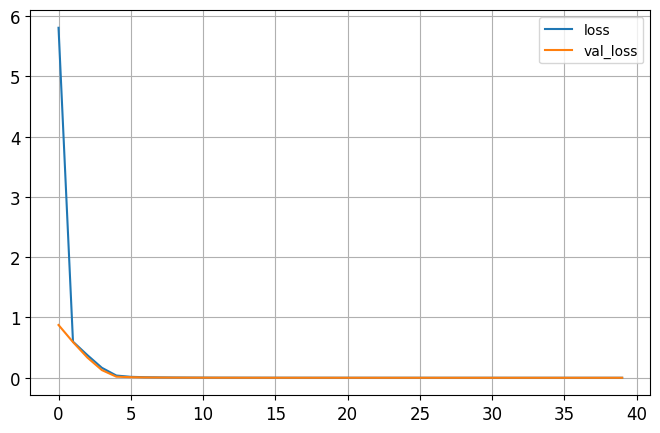

In [14]:
history = model.fit(X_train, y_train, batch_size=10, epochs=40,
                    validation_data=(X_valid, y_valid))
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

3. Test

In [15]:
model.predict_classes(X_test)

AttributeError: 'Sequential' object has no attribute 'predict_classes'

Vérification du test

## Exemple 4

- IA pour détecter une grossesse
- Pour une enseigne de supermarché
- Un ensemble d'information est collecté grâce à la carte de fidélité enregistrant les achats (500)
- Chez 300 clients, l'enseigne a su qu'il y avait eu une grossesse ou pas

![](https://gitlab.inria.fr/Seshat/internetprivacy/-/raw/master/img1/target.jpg)

In [ ]:
[Xtemp,ytemp] = computePregnancy(500,300)